# Transformation of Features

### Why Transformation of Features is Required?

Having features on a similiar scale can help **gradient descent** to converge more quickly towards the **Global Mininma**. 

We scale our data before employing a **Eucledian Distance** based learning algrorithm ,so that all the fetures contribute equally to the result.



### Types Of Transformation
1. Standardization
2. Normalization/Min-Max Transformation
3. Robust Scaling To Median And Quantiles
4. Guassian Transformation
**   Logarithmic Transformation
**   Reciprocal Trnasformation
**   Square Root Transformation
**   Exponential Trnasformation
**   Box Cox Transformation

#### Standardization
In this type of transformation we try to bring all the variables or features to a similar scale by changing them into **Standard Nomal Distribution**


**z=(x-x_mean)/std**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [4]:
df.isnull().any()

Survived    False
Pclass      False
Age         False
Fare        False
dtype: bool

In [5]:
## Now Performing Standardisation
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [7]:
## The data is in array form
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

Text(0.5, 1.0, 'Fare')

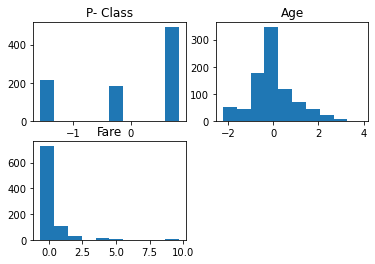

In [23]:
plt.subplot(2,2,1)
plt.hist(df_scaled[:,1])
plt.title('P- Class')

plt.subplot(2,2,2)
plt.hist(df_scaled[:,2])
plt.title('Age')

plt.subplot(2,2,3)
plt.hist(df_scaled[:,3])
plt.title('Fare')

#### Normalization/ Min-Max Scaling
In this type of transformation technique the values are shifted and rescaled so that they end up ranging between 0 and 1

**X_scaled = (X - X_min / (X_max - X_min)**



In [24]:
dataset=pd.read_csv('StudentsPerformance.csv',usecols=['math score','reading score','writing score'])

In [25]:
dataset.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


Text(0.5, 1.0, 'Performance in Writing')

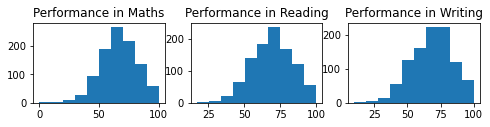

In [38]:
plt.figure(figsize=[8,5])
plt.subplot(3,3,1)
plt.hist(dataset['math score'])
plt.title('Performance in Maths')

plt.subplot(3,3,2)
plt.hist(dataset['reading score'])
plt.title('Performance in Reading')

plt.subplot(3,3,3)
plt.hist(dataset['writing score'])
plt.title('Performance in Writing')

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_max=MinMaxScaler()
dataset_scaled=min_max.fit_transform(dataset)

Text(0.5, 1.0, 'Writing Performance')

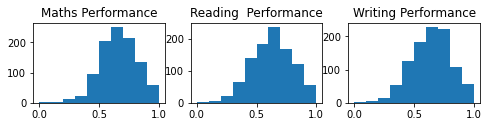

In [52]:
plt.figure(figsize=[8,5])
plt.subplot(3,3,1)
plt.hist(dataset_scaled[:,0])
plt.title('Maths Performance')

plt.subplot(3,3,2)
plt.hist(dataset_scaled[:,1])
plt.title('Reading  Performance')

plt.subplot(3,3,3)
plt.hist(dataset_scaled[:,2])
plt.title('Writing Performance')

#### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

**IQR = 75th quantile - 25th quantile**

**X_scaled = (X - X_median) / IQR**

In [57]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Pclass','Survived'])

In [58]:
from sklearn.preprocessing import RobustScaler

In [62]:
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


Text(0.5, 1.0, 'Fare Distribution')

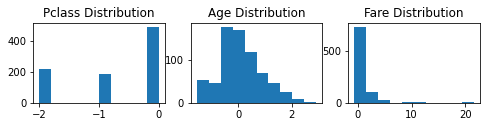

In [64]:
plt.figure(figsize=[8,5])
plt.subplot(3,3,1)
plt.hist(df_robust_scaler['Pclass'])
plt.title('Pclass Distribution')

plt.subplot(3,3,2)
plt.hist(df_robust_scaler['Age'])
plt.title('Age Distribution')

plt.subplot(3,3,3)
plt.hist(df_robust_scaler['Fare'])
plt.title('Fare Distribution')